In [18]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.4.3
0.11.2


Попробуем проанализировать дата фреймы построенные на рыночных данных двух крупнейших телекомов США AT&T и Verizon. Парсим данные с yahoo finance.

In [31]:
url_T = 'https://query1.finance.yahoo.com/v7/finance/download/T?period1=1612273332&period2=1643809332&interval=1d&events=history&includeAdjustedClose=true'
T_data=pd.read_csv(url_T)
url_VZ = 'https://query1.finance.yahoo.com/v7/finance/download/VZ?period1=1612646966&period2=1644182966&interval=1d&events=history&includeAdjustedClose=true'
VZ_data=pd.read_csv(url_VZ)

Приведем дата фреймы в более удобный вид:

In [32]:
T_data.shape
T_data.head()
VZ_data.shape
VZ_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-08,55.369999,55.480000,54.790001,55.049999,52.593212,17887700
1,2021-02-09,55.020000,55.299999,54.680000,55.000000,52.545448,19605600
2,2021-02-10,55.220001,55.439999,54.919998,54.959999,52.507229,16232800
3,2021-02-11,55.020000,55.060001,54.480000,54.599998,52.163296,17398800
4,2021-02-12,54.419998,54.680000,54.180000,54.200001,51.781155,18357300


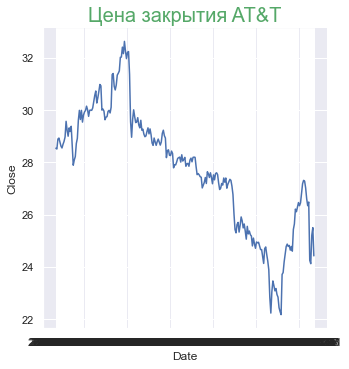

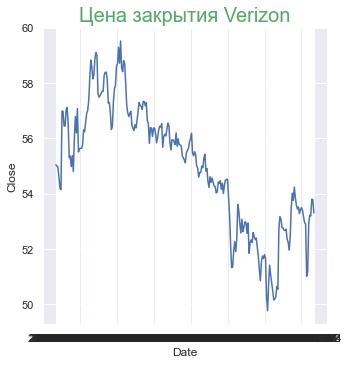

In [33]:
sns.set(style='darkgrid')  
sns.relplot(
    x=T_data['Date'], 
    y=T_data['Close'],  
    kind='line'
)
plt.title('Цена закрытия AT&T', size=20, color='g');

sns.set(style='darkgrid')  
sns.relplot(
    x=VZ_data['Date'], 
    y=VZ_data['Close'],  
    kind='line'
)
plt.title('Цена закрытия Verizon', size=20, color='g');

Из построенных графиков видна корреляция цен акций двух компаний, построим также графики объема торгов:

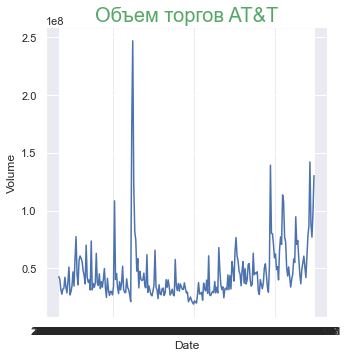

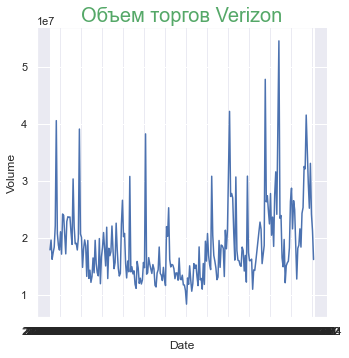

In [34]:
sns.set(style='darkgrid')  
sns.relplot(
    x=T_data['Date'], 
    y=T_data['Volume'],  
    kind='line'
)
plt.title('Объем торгов AT&T', size=20, color='g');

sns.set(style='darkgrid')  
sns.relplot(
    x=VZ_data['Date'], 
    y=VZ_data['Volume'],  
    kind='line'
)
plt.title('Объем торгов Verizon', size=20, color='g');

Создадим дата фрейм из цен закрытия по нескольким компаниям и проверим корреляцию. Добавим данные по компаниям Intel, Facebook, Microsoft.

In [47]:
url_FB = 'https://query1.finance.yahoo.com/v7/finance/download/FB?period1=1612650629&period2=1644186629&interval=1d&events=history&includeAdjustedClose=true'
FB_data=pd.read_csv(url_FB)
url_INTC = 'https://query1.finance.yahoo.com/v7/finance/download/INTC?period1=1612650861&period2=1644186861&interval=1d&events=history&includeAdjustedClose=true'
INTC_data=pd.read_csv(url_INTC)
url_MSFT = 'https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1612650943&period2=1644186943&interval=1d&events=history&includeAdjustedClose=true'
MSFT_data=pd.read_csv(url_MSFT)
FB_data.shape
FB_data.head()
INTC_data.shape
INTC_data.head()
MSFT_data.shape
MSFT_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-08,243.149994,243.679993,240.809998,242.470001,240.454437,22211900
1,2021-02-09,241.869995,244.759995,241.380005,243.770004,241.743637,23565000
2,2021-02-10,245.000000,245.919998,240.889999,242.820007,240.801529,22186700
3,2021-02-11,244.779999,245.149994,242.149994,244.490005,242.457657,15751100
4,2021-02-12,243.929993,245.300003,242.729996,244.990005,242.953491,16561100


In [48]:
df = pd.DataFrame()
df["T"]=T_data['Close']
df['VZ']= VZ_data['Close']
df['INTC']=INTC_data["Close"]
df['FB']=FB_data['Close']
df["MSFT"]=MSFT_data['Close']

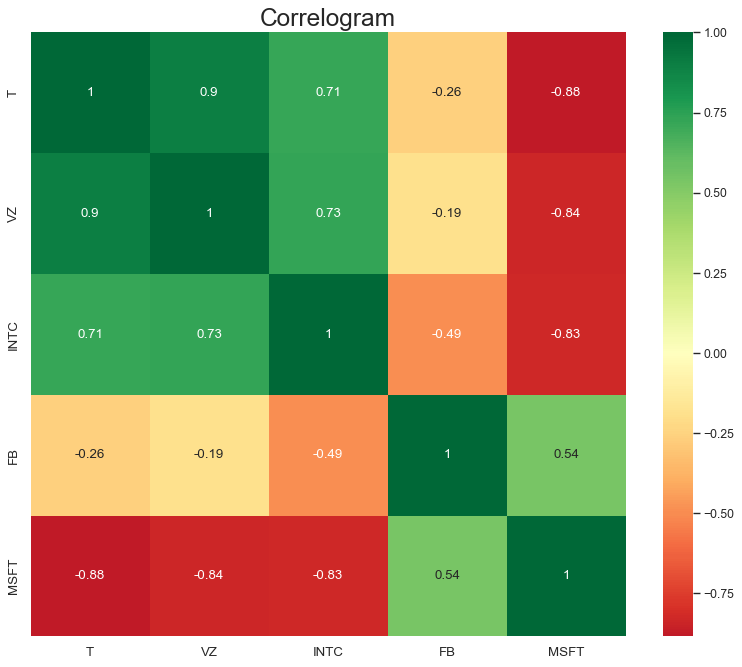

In [49]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Из представленного графика видно, что так называемые растущие акции имеют обратную корреляцию с традиционными дивидендными акциями. При этом видна сильная корреляция между акциями AT&T и Verizon, так как они принадлежат к одному сектору экономики.

Также можно посмотреть корреляцию Объемов торгов по компаниям:

In [50]:
df = pd.DataFrame()
df["T"]=T_data['Volume']
df['VZ']= VZ_data['Volume']
df['INTC']=INTC_data["Volume"]
df['FB']=FB_data['Volume']
df["MSFT"]=MSFT_data['Volume']

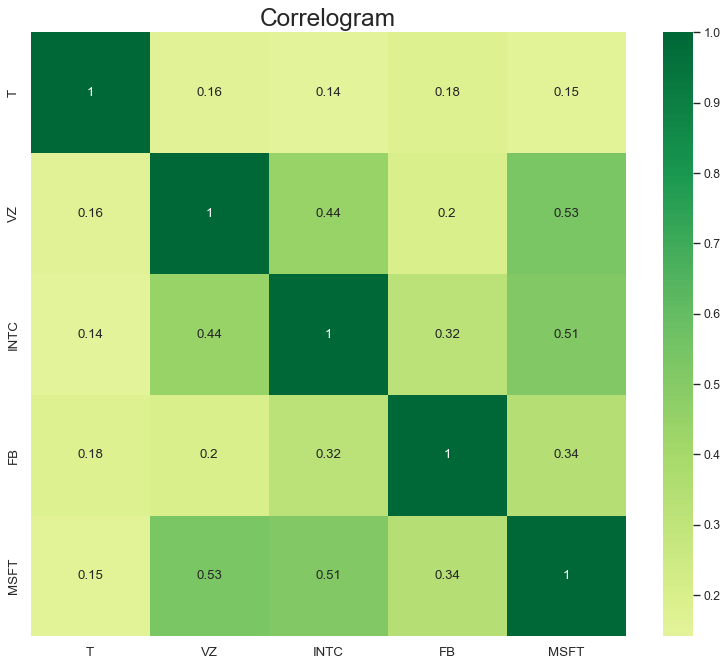

In [51]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()